In [ ]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml -P drive/gaze

!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml -P drive/gaze

--2023-10-30 05:05:33--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 341406 (333K) [text/plain]
Saving to: ‘drive/gaze/haarcascade_eye.xml’

haarcascade_eye.xml 100%[===================>] 333.40K  --.-KB/s    in 0.01s   

2023-10-30 05:05:33 (22.0 MB/s) - ‘drive/gaze/haarcascade_eye.xml’ saved [341406/341406]

--2023-10-30 05:05:33--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


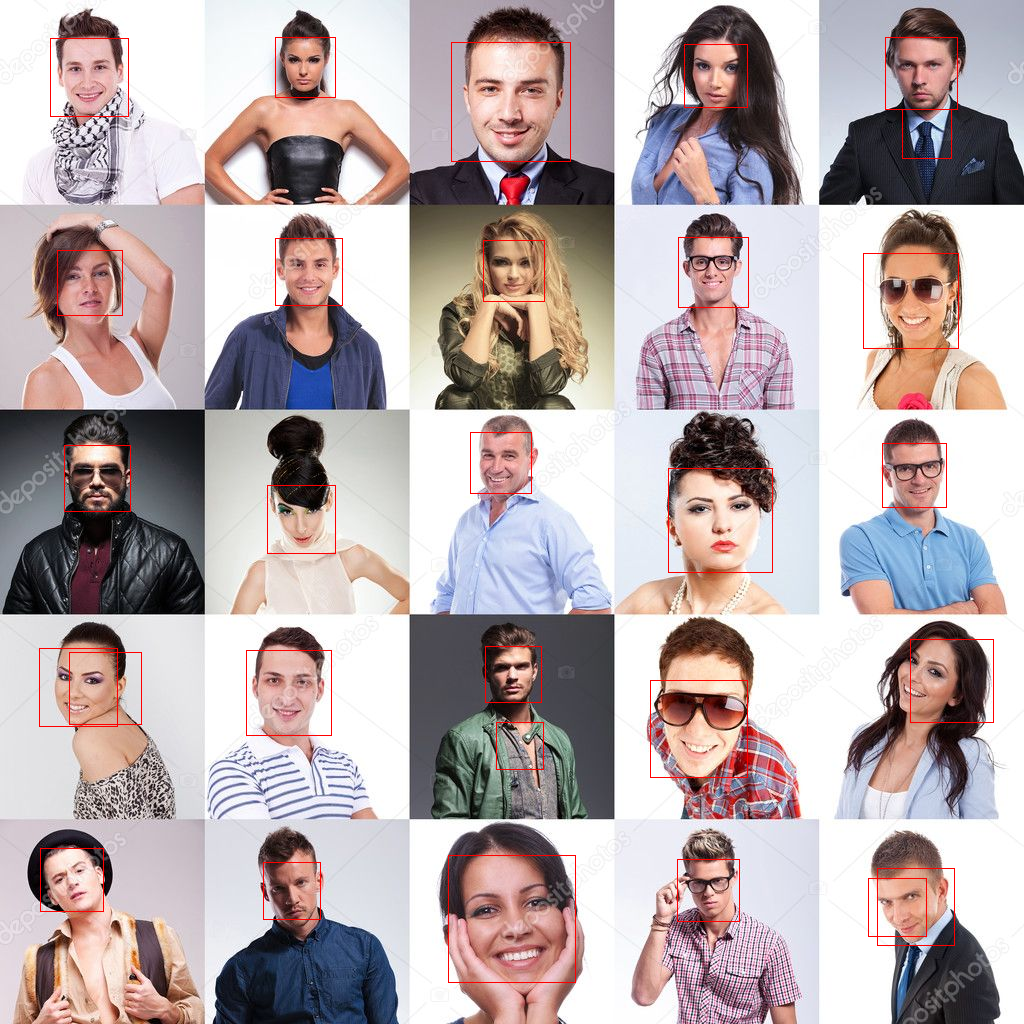

In [ ]:
#plot photo with detected faces using opencv cascade classifier
from cv2 import imread
from cv2 import imshow
from cv2 import waitKey
from cv2 import destroyAllWindows
from cv2 import CascadeClassifier
from cv2 import rectangle
from google.colab.patches import cv2_imshow
# load the photograph
pixels = imread( '/content/gdrive/MyDrive/faces.jpeg')
# load the pre-trained model
classifier = CascadeClassifier('/content/drive/gaze/haarcascade_frontalface_default.xml')
# perform face detection
boxes = classifier.detectMultiScale (pixels)
# print bounding box for each detected face
for box in boxes:
    # extract
    X, Y, width, height = box
    X2, y2 = X + width, Y + height
    # draw a rectangle over the pixels
    rectangle (pixels, (X, Y), (X2, y2), (0,0,255), 1)
# show the image
cv2_imshow(pixels)
# keep the window open until we press a key
waitKey(0)
# close the window
destroyAllWindows ()

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
import pandas

od.download(
	"https://www.kaggle.com/datasets/ashwingupta3012/human-faces")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mennareda25
Your Kaggle Key: ··········


100%|██████████| 1.82G/1.82G [00:57<00:00, 33.8MB/s]


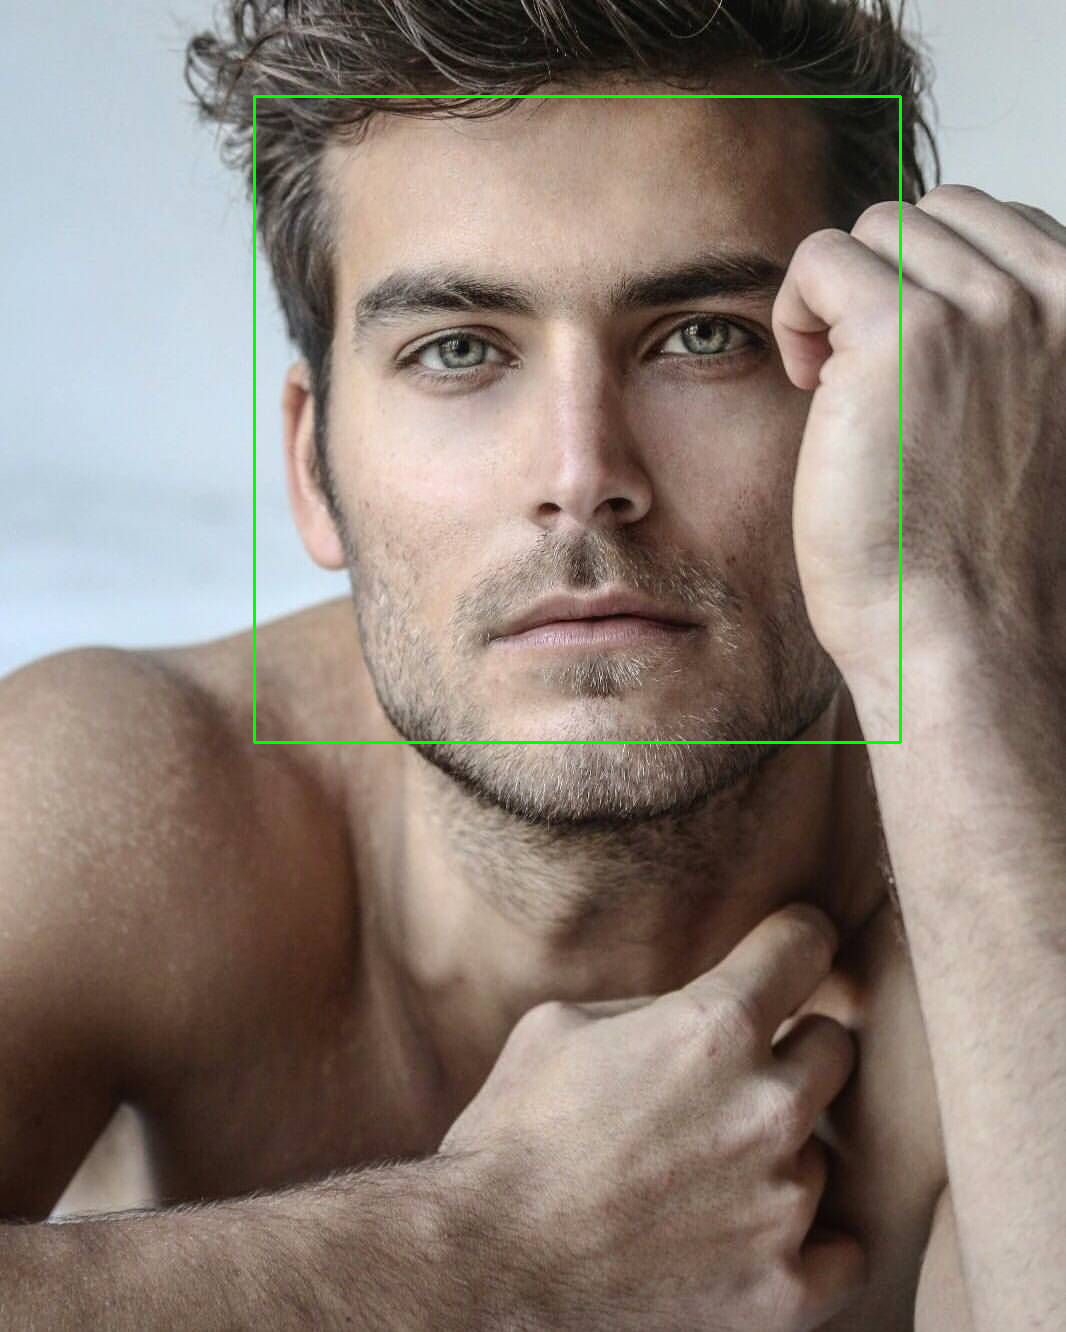

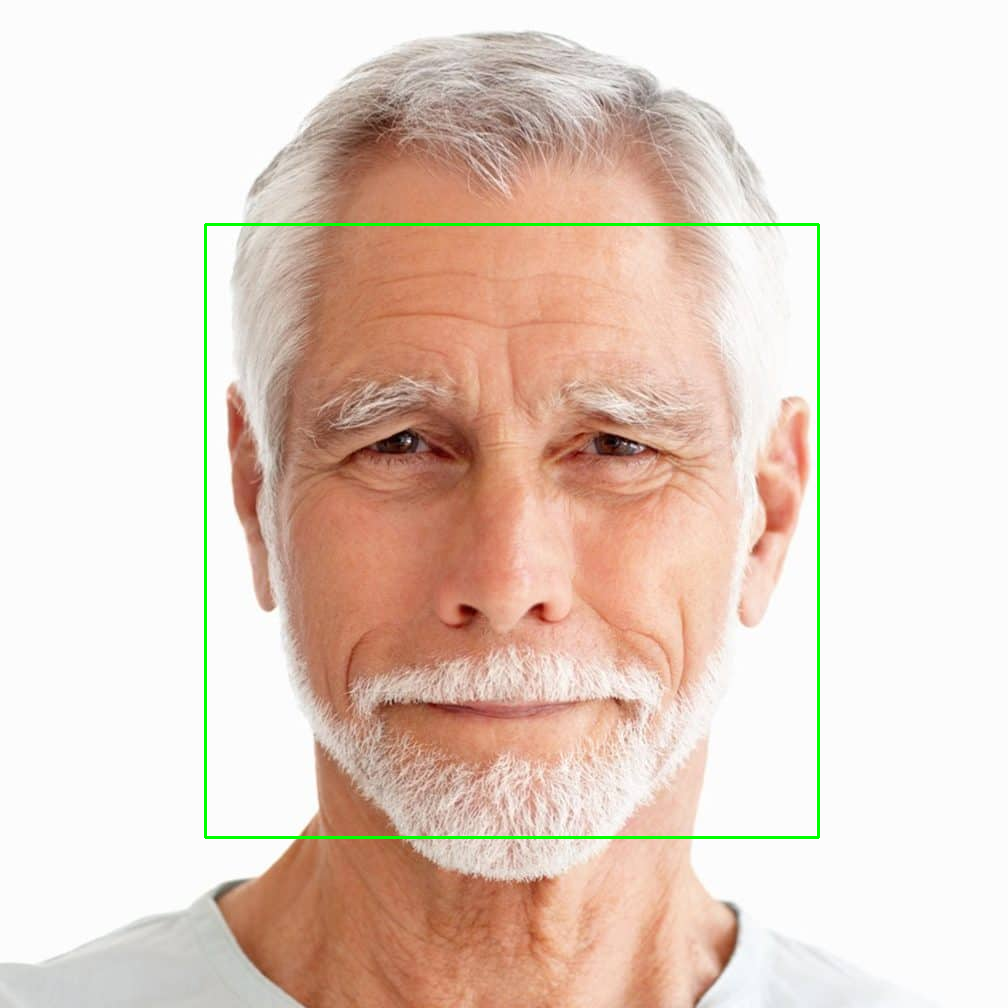

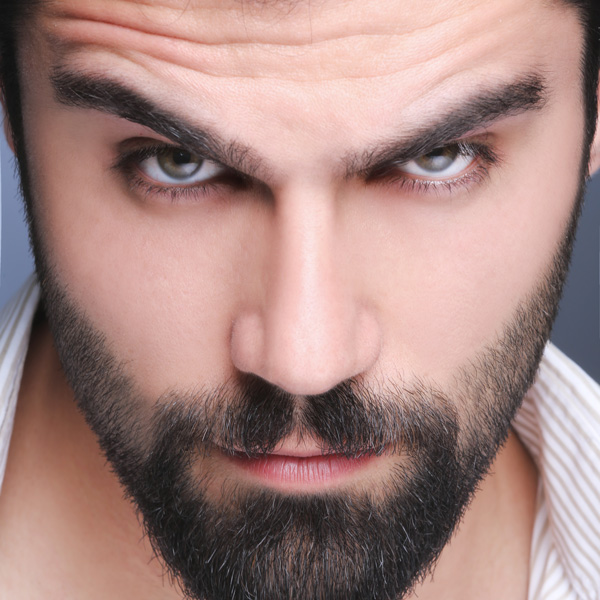

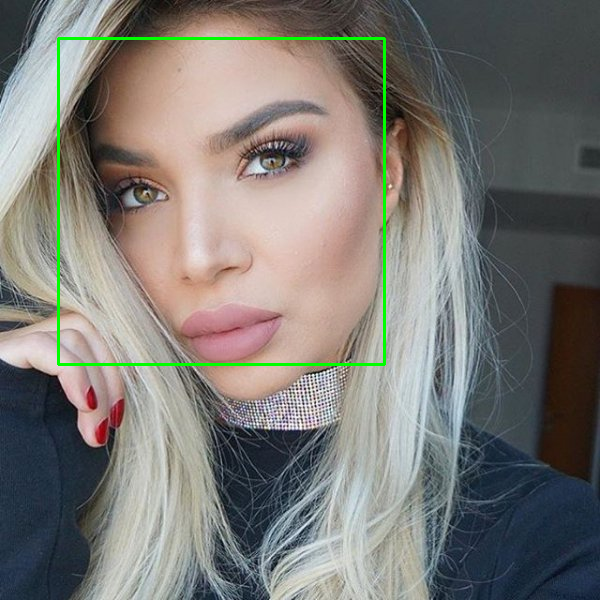

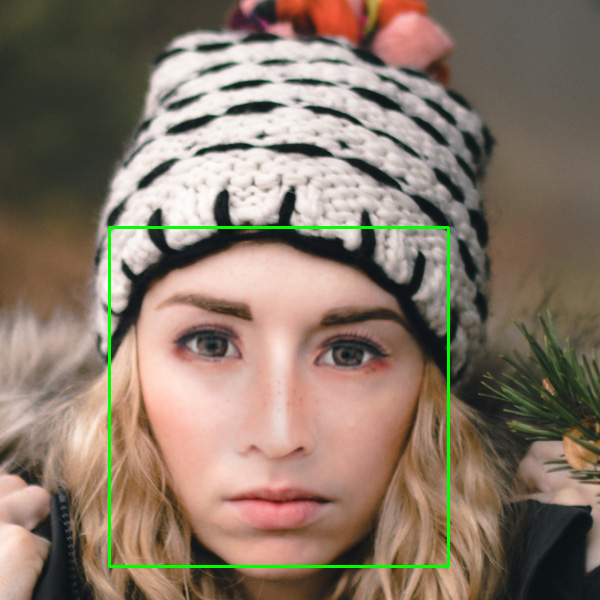

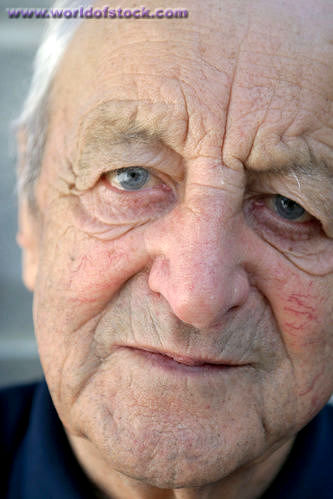

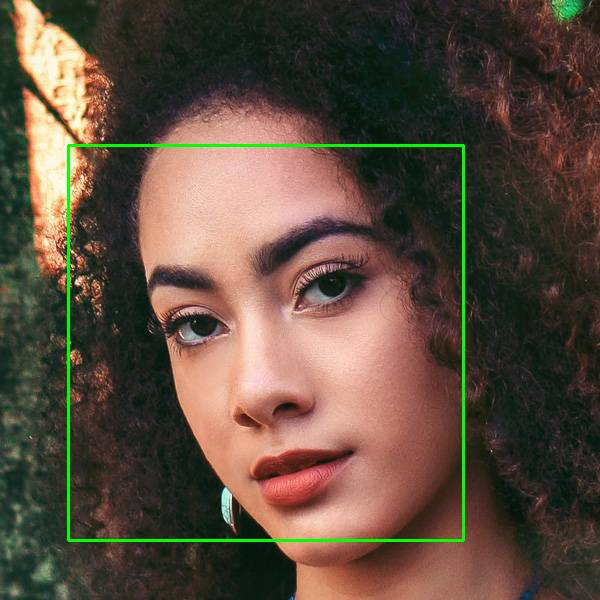

In [ ]:
import os
import cv2
from google.colab.patches import cv2_imshow

# Load the pre-trained face detection model (Haar cascades)
face_cascade = cv2.CascadeClassifier('/content/drive/gaze/haarcascade_frontalface_default.xml')

# Directory containing the images
image_directory = '/content/human-faces/Humans'

# Process each image in the directory
for filename in os.listdir(image_directory):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Read the image
        image_path = os.path.join(image_directory, filename)
        image = cv2.imread(image_path)

        # Convert the image to grayscale for face detection
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Perform face detection
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        # Process each detected face
        for (x, y, w, h) in faces:
            # Draw a rectangle around the face
            cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Display the image with detected faces
        cv2_imshow(image)
        cv2.waitKey(0)

# Close all OpenCV windows
cv2.destroyAllWindows()